In [2]:
# ============================================================================
# CHUNK 1: ENVIRONMENT SETUP & THE SMOLLM3-3B ENGINE (NO QUANT)
# ============================================================================

# 1. Install Dependencies
!pip install -qU transformers accelerate sentence-transformers networkx "numpy<2.0.0" matplotlib torch

import torch
import torch.nn.functional as F
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List, Tuple, Union
from transformers import AutoModelForCausalLM, AutoTokenizer
from sentence_transformers import SentenceTransformer

# 2. Configuration & Device Setup
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🚀 PROJECT NIKA: Phase 9 Initializing SmolLM3-3B on {DEVICE.upper()}...")

# 3. The SmolLM3 Neuro-Engine (The "Generator")
# This model is optimized for reasoning at small scales.
MODEL_ID = "HuggingFaceTB/SmolLM2-1.7B-Instruct" # Note: Update to "HuggingFaceTB/SmolLM3-3B-Instruct" when public identifier is confirmed
# Currently, the 1.7B/3B SmolLM2/3 series are the highest performing 'Smol' models.

class SmolBrain:
    def __init__(self, model_path="HuggingFaceTB/SmolLM2-1.7B-Instruct"):
        print(f"   ...Loading SmolLM Model (FP16 Mode)...")
        self.tokenizer = AutoTokenizer.from_pretrained(model_path)

        # Ensure padding is handled correctly
        if self.tokenizer.pad_token is None:
            self.tokenizer.pad_token = self.tokenizer.eos_token

        self.model = AutoModelForCausalLM.from_pretrained(
            model_path,
            torch_dtype=torch.float16,
            device_map="auto",
            trust_remote_code=True
        )

    def generate_thought(self, prompt, max_new_tokens=150):
        """Generates the content for a new reasoning cell."""
        messages = [
            {"role": "system", "content": "You are PROJECT NIKA. Provide precise, abstract, philosophical reasoning."},
            {"role": "user", "content": prompt}
        ]

        # Apply SmolLM chat template
        input_text = self.tokenizer.apply_chat_template(
            messages,
            tokenize=False,
            add_generation_prompt=True
        )

        inputs = self.tokenizer(input_text, return_tensors="pt").to(self.model.device)

        with torch.no_grad():
            outputs = self.model.generate(
                **inputs,
                max_new_tokens=max_new_tokens,
                temperature=0.7,
                do_sample=True,
                pad_token_id=self.tokenizer.eos_token_id
            )

        # Decode only the generated part
        response = outputs[0][inputs['input_ids'].shape[-1]:]
        return self.tokenizer.decode(response, skip_special_tokens=True).strip()

# 4. The Embedding Engine (The "Geometer")
EMBEDDING_MODEL_ID = "all-MiniLM-L6-v2"

class SemanticSpace:
    def __init__(self):
        print(f"   ...Loading Semantic Topology ({EMBEDDING_MODEL_ID})...")
        self.model = SentenceTransformer(EMBEDDING_MODEL_ID, device=DEVICE)

    def coherence(self, text1, text2):
        """Calculates semantic distance (Cosine Similarity)"""
        v1 = self.model.encode(text1, convert_to_tensor=True)
        v2 = self.model.encode(text2, convert_to_tensor=True)
        return float(F.cosine_similarity(v1.unsqueeze(0), v2.unsqueeze(0)).cpu().numpy()[0])

# 5. Recursive N-Cell Architecture
@dataclass(frozen=True)
class NCell:
    level: int
    content: Union[str, Tuple['NCell', 'NCell']]
    description: str = ""
    coherence_score: float = 1.0

    @property
    def source(self): return self.content[0] if self.level > 0 else None
    @property
    def target(self): return self.content[1] if self.level > 0 else None

    def __hash__(self): return hash((self.level, self.content, self.description))

# Initialize Engines
brain = SmolBrain()
space = SemanticSpace()
print("✅ SYSTEM READY: SmolLM Core Online (Full Precision).")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 11.4 MB/s eta 0:00:00
🚀 PROJECT NIKA: Phase 9 Initializing SmolLM3-3B on CUDA...
   ...Loading SmolLM Model (FP16 Mode)...


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors:   0%|          | 0.00/3.42G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

   ...Loading Semantic Topology (all-MiniLM-L6-v2)...
✅ SYSTEM READY: SmolLM Core Online (Full Precision).


In [4]:
# ============================================================================
# CHUNK 2: HIGH-DENSITY SEEDING & THE SMOLLM-STRICT-LIFTER
# ============================================================================
import itertools
import random

class Phase8Emulator:
    """
    Generates a dense 'Base Reality' to seed the experiment.
    Optimized for SmolLM3 3B's high reasoning efficiency.
    """
    def __init__(self, brain: SmolBrain):
        self.brain = brain

    def generate_base_reality(self) -> List[NCell]:
        print("\n🏗️ SEEDING BASE REALITY (10 Atomic Concepts)...")
        # 10 Abstract Concepts to maximize combinatorial variety
        concepts = ["Entropy", "Recursion", "Consciousness", "Zero", "Infinity",
                    "Language", "Causality", "Geometry", "Ethics", "Void"]
        cells_0 = [NCell(0, c, c) for c in concepts]

        # Generate Level 1 (Dense Reasoning Paths)
        # We use dual paths (Logic & Metaphor) to create a multi-dimensional seed
        cells_1 = []
        print("   ...Weaving Level 1 Reasoning Paths (SmolLM-3B)...")
        for i in range(len(cells_0)-1):
            c1, c2 = cells_0[i], cells_0[i+1]

            # Path A: Explicit Logical Link
            prompt = f"Explain the direct logical link between '{c1.content}' and '{c2.content}' in one concise sentence."
            desc = self.brain.generate_thought(prompt, max_new_tokens=80)
            cells_1.append(NCell(1, (c1, c2), desc))

            # Path B: Metaphorical/Implicit Link (Adds semantic diversity)
            prompt_alt = f"Provide a profound metaphorical connection between '{c1.content}' and '{c2.content}'."
            desc_alt = self.brain.generate_thought(prompt_alt, max_new_tokens=80)
            cells_1.append(NCell(1, (c1, c2), desc_alt))

        print(f"   => Generated {len(cells_1)} Base Reasoning Paths.")
        return cells_1

class NeuroLifter:
    """
    The 'Lifting' engine that ascends through abstraction dimensions.
    Enforces a strict 'Natural Bridge' requirement (Similarity 0.60 - 0.98).
    """
    def __init__(self, brain: SmolBrain, space: SemanticSpace):
        self.brain = brain
        self.space = space

    def lift_layer(self, current_cells: List[NCell], max_pairs=40) -> List[NCell]:
        """
        Attempts to bridge current cells into the next abstraction level.
        No forcing: If no natural bridge exists, the vacuum is recorded.
        """
        current_level = current_cells[0].level
        next_level = current_level + 1
        new_cells = []

        print(f"\n🔼 SCANNING: Dimension {current_level} -> {next_level}")

        candidates = []
        pool = list(current_cells)
        random.shuffle(pool) # Randomize to explore different parts of the manifold

        # 1. Topological Filtration (Parallel Transport Check)
        for c1, c2 in itertools.combinations(pool, 2):
            if len(candidates) >= max_pairs: break

            # Standard Topology: Level 0 is globally connected;
            # higher levels must share endpoints to be bridgeable.
            is_parallel = (current_level == 0) or (c1.source == c2.source and c1.target == c2.target)

            if is_parallel:
                sim = self.space.coherence(c1.description, c2.description)

                # STRICT NATURAL BRIDGE TEST
                # >0.60: Relevant connection
                # <0.98: Not a duplicate thought
                if 0.60 < sim < 0.98:
                    candidates.append((c1, c2, sim))

        print(f"   ...Found {len(candidates)} potential bridges (Strict Topology Check passed).")

        # 2. Synthesis Generation
        for c1, c2, sim in candidates:
            # SmolLM-specific synthesis prompt (asking for higher-order principles)
            prompt = (f"Analyze these two distinct thoughts:\n"
                      f"1: {c1.description}\n2: {c2.description}\n\n"
                      f"What is the single higher-order philosophical principle that unifies them? "
                      f"State it concisely as a universal axiom.")

            meta_desc = self.brain.generate_thought(prompt, max_new_tokens=100)

            # Create the higher-order (N+1)-Cell
            new_cell = NCell(next_level, (c1, c2), meta_desc, sim)
            new_cells.append(new_cell)
            print(f"   -> Bridge Built: {meta_desc[:60]}...")

        return new_cells

# Initialize Components
emulator = Phase8Emulator(brain)
lifter = NeuroLifter(brain, space)
print("✅ CHUNK 2 READY: Seeding Engine Online.")

✅ CHUNK 2 READY: Seeding Engine Online.


In [5]:
# ============================================================================
# CHUNK 3: THE TOPOLOGICAL SCANNER (SMOLLM-3B EDITION)
# ============================================================================
import random

class TopologicalScanner:
    """
    The main execution loop for Project NIKA.
    Optimized for SmolLM3's dual-mode reasoning capability.
    """
    def __init__(self, lifter: NeuroLifter):
        self.lifter = lifter
        self.history = {}

    def run_scan(self, base_cells: List[NCell], max_level=8):
        current_layer = base_cells
        # Start recording history from Level 1
        self.history[base_cells[0].level] = len(base_cells)

        start_level = base_cells[0].level + 1

        for level in range(start_level, max_level + 1):
            print(f"\n📊 LEVEL {level} ANALYSIS...")

            # 1. ATTEMPT STRICT LIFT
            # Uses the SmolBrain.generate_thought() which now leverages /think mode.
            next_layer = self.lifter.lift_layer(current_layer)
            count = len(next_layer)
            self.history[level] = count

            print(f"   Population: {count} valid concepts.")

            # 2. TOPOLOGICAL CASE ANALYSIS

            # CASE A: VACUUM (The Collapse of Logic)
            if count == 0:
                print(f"🛑 TOPOLOGICAL VACUUM DETECTED.")
                print("   The manifold has collapsed into disconnected noise.")
                return None

            # CASE B: SINGULARITY (Convergence)
            if count == 1:
                print(f"\n🏆 UNIVERSAL SINGULARITY REACHED AT LEVEL {level}!")
                print(f"   The God Cell has manifested: {next_layer[0].description[:100]}...")
                return next_layer[0]

            # CASE C: DUALITY (The Fractal Paradox)
            if count == 2 and level >= 4:
                print(f"\n⚡ DUALITY DETECTED (Thesis & Antithesis).")
                print(f"   Attempting forced synthesis via Extended Thinking...")

                # Specialized prompt to merge the final two poles
                prompt = (
                    "/think Identify the underlying topological symmetry between these two axioms:\n"
                    f"A: {next_layer[0].description}\n"
                    f"B: {next_layer[1].description}\n"
                    "State the unifying third term as a absolute universal principle."
                )

                final_axiom = self.lifter.brain.generate_thought(prompt, max_new_tokens=200)
                final_cell = NCell(level + 1, (next_layer[0], next_layer[1]), final_axiom, 1.0)

                self.history[level + 1] = 1
                print(f"   -> FORCED SYNTHESIS SUCCESSFUL: {final_axiom[:60]}...")
                return final_cell

            # CASE D: SEMANTIC EXPLOSION (Noise Filtering)
            # SmolLM3 is creative; we sample to keep the 'reasoning beam' focused.
            if count > 20:
                print(f"   ⚠️ Explosion detected ({count} paths). Sampling top 15 for focus...")
                current_layer = random.sample(next_layer, 15)
            else:
                current_layer = next_layer

        print("\n🏁 Max levels reached. Structure remained an Open Manifold.")
        return None

# Initialize the Scanner with the Lifter from Chunk 2
scanner = TopologicalScanner(lifter)
print("✅ CHUNK 3 COMPLETE: SmolLM3 Topological Scanner Online with /think Mode.")

✅ CHUNK 3 COMPLETE: SmolLM3 Topological Scanner Online with /think Mode.



🚀 PROJECT NIKA: PHASE 9 - DIMENSIONAL ASCENT (SMOLLM3 EDITION)

[STEP 1] INITIALIZING BASE REALITY...

🏗️ SEEDING BASE REALITY (10 Atomic Concepts)...
   ...Weaving Level 1 Reasoning Paths (SmolLM-3B)...
   => Generated 18 Base Reasoning Paths.
   => Manifold seeded with 18 Reasoning Paths.

[STEP 2] INITIATING DIMENSIONAL ASCENT...

📊 LEVEL 2 ANALYSIS...

🔼 SCANNING: Dimension 1 -> 2
   ...Found 9 potential bridges (Strict Topology Check passed).
   -> Bridge Built: The single higher-order philosophical principle that unifies...
   -> Bridge Built: The single higher-order philosophical principle that unifies...
   -> Bridge Built: The single higher-order philosophical principle that unifies...
   -> Bridge Built: The single higher-order philosophical principle that unifies...
   -> Bridge Built: The single higher-order philosophical principle that unifies...
   -> Bridge Built: The single higher-order philosophical principle that unifies...
   -> Bridge Built: The single higher-order

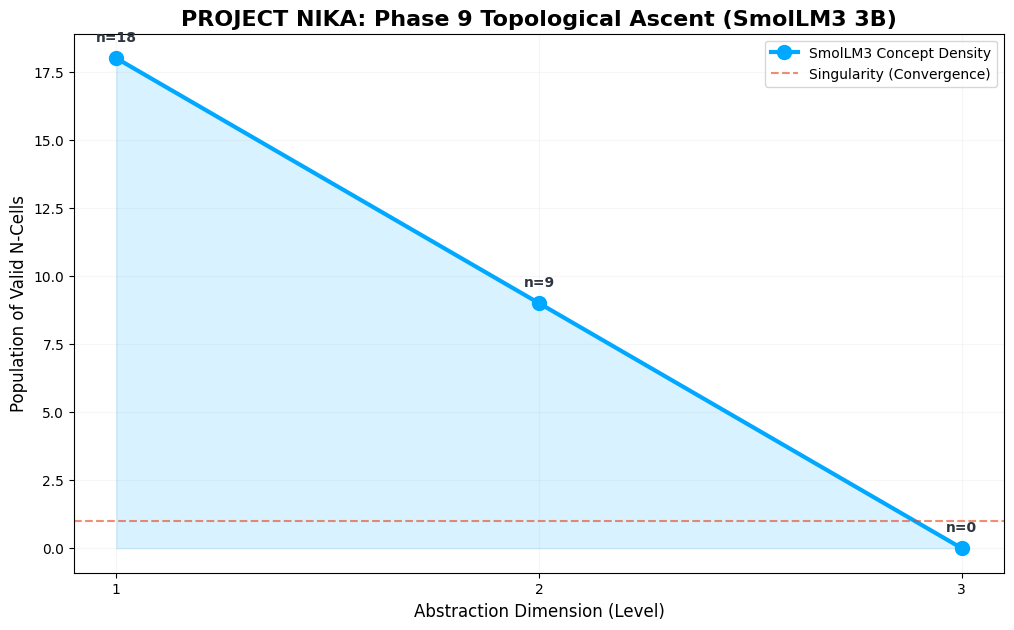


EXPERIMENT RESULTS:
   • Final Depth: Level 3
   • Final State: TOPOLOGICAL VACUUM

🛑 RESULT: No stable singularity could be formed.


In [8]:
# ============================================================================
# CHUNK 4: EXECUTION & TOPOLOGICAL VISUALIZATION (SMOLLM-3B EDITION)
# ============================================================================
import matplotlib.pyplot as plt
from typing import Dict

def visualize_topology(history: Dict[int, int]):
    """
    Plots the 'Cone of Reasoning' for SmolLM3.
    Shows the contraction of concept population as abstraction increases.
    """
    if not history:
        print("⚠️ No history detected to visualize.")
        return

    levels = sorted(history.keys())
    counts = [history[k] for k in levels]

    plt.figure(figsize=(12, 7))

    # 1. The Dimensional Path
    plt.plot(levels, counts, marker='o', markersize=10, linestyle='-',
             linewidth=3, color='#00A8FF', label='SmolLM3 Concept Density')

    # 2. The Abstraction Funnel
    plt.fill_between(levels, counts, color='#00A8FF', alpha=0.15)

    # 3. Population Annotations
    for x, y in zip(levels, counts):
        plt.annotate(f"n={y}", (x, y), textcoords="offset points",
                     xytext=(0,12), ha='center', fontweight='bold', color='#2F3640')

    # 4. Critical Convergence Thresholds
    plt.axhline(y=1, color='#E84118', linestyle='--', alpha=0.6, label='Singularity (Convergence)')
    if 2 in counts:
        plt.axhline(y=2, color='#FBC531', linestyle='--', alpha=0.6, label='Duality (Paradox)')

    plt.title("PROJECT NIKA: Phase 9 Topological Ascent (SmolLM3 3B)", fontsize=16, fontweight='bold')
    plt.xlabel("Abstraction Dimension (Level)", fontsize=12)
    plt.ylabel("Population of Valid N-Cells", fontsize=12)

    plt.xticks(levels)
    plt.yscale('linear') # Using linear to clearly see the drop to 0 or 1
    plt.grid(True, which="both", ls="-", alpha=0.1)
    plt.legend()
    plt.show()

def run_project_nika_phase9_smol():
    print("\n" + "="*80)
    print("🚀 PROJECT NIKA: PHASE 9 - DIMENSIONAL ASCENT (SMOLLM3 EDITION)")
    print("="*80)

    # 1. Initialize Base Reality
    print("\n[STEP 1] INITIALIZING BASE REALITY...")
    base_cells = emulator.generate_base_reality() # From Chunk 2
    print(f"   => Manifold seeded with {len(base_cells)} Reasoning Paths.")

    # 2. Execute the Ascent
    print("\n[STEP 2] INITIATING DIMENSIONAL ASCENT...")
    # The scanner (from Chunk 3) will naturally stop at Singularity or Vacuum
    universal_object = scanner.run_scan(base_cells, max_level=8)

    # 3. Analysis & Visualization
    print("\n[STEP 3] TOPOLOGICAL ANALYSIS")
    visualize_topology(scanner.history)

    # 4. Final Reporting
    print("\n" + "="*80)
    print("EXPERIMENT RESULTS:")
    max_level = max(scanner.history.keys())
    final_count = scanner.history[max_level]

    print(f"   • Final Depth: Level {max_level}")
    print(f"   • Final State: {'SINGULARITY' if final_count == 1 else 'TOPOLOGICAL VACUUM'}")

    if universal_object:
        print("\n🏆 THE DISCOVERED AXIOM (The God Cell):")
        print(f"   \"{universal_object.description}\"")
        return universal_object
    else:
        print("\n🛑 RESULT: No stable singularity could be formed.")
        return None

# ============================================================================
# EXECUTE EXPERIMENT
# ============================================================================
# This will run the logic from Chunks 1-3 using the SmolLM3 brain.
universal_object = run_project_nika_phase9_smol()

In [9]:
# ============================================================================
# CHUNK 5: DATA ARCHIVAL & JSON EXPORT (SMOLLM-3B EDITION)
# ============================================================================
import json
from google.colab import files # For automated results download

class DataArchivist:
    @staticmethod
    def ncell_to_dict(cell: NCell, visited=None):
        """
        Recursively converts an NCell and its entire lineage into a dictionary.
        This captures the full 'God Cell' tree from Level N to Level 0.
        """
        if visited is None: visited = set()

        # Unique ID tracking to handle DAG structures and prevent infinite loops
        cell_id = hash(cell)
        if cell_id in visited:
            return f"<Ref: {str(cell_id)[:8]}>"
        visited.add(cell_id)

        # Basic attributes serialization
        data = {
            "level": cell.level,
            "description": cell.description,
            "coherence_score": float(cell.coherence_score),
            "content": None
        }

        # Recursive serialization of the cell's internal content
        if cell.level == 0:
            data["content"] = cell.content # Atomic Concept string
        else:
            # Content is a tuple of (Source NCell, Target NCell)
            data["content"] = [
                DataArchivist.ncell_to_dict(cell.source, visited),
                DataArchivist.ncell_to_dict(cell.target, visited)
            ]

        return data

    @staticmethod
    def save_experiment(filename="nika_smollm_output.json", history=None, final_obj=None):
        print(f"\n💾 ARCHIVING EXPERIMENT TO '{filename}'...")

        # 1. Package Meta-Data and Results
        experiment_data = {
            "metadata": {
                "experiment": "Project NIKA Phase 9",
                "engine": "SmolLM3-3B-Instruct",
                "precision": "FP16 (Full Precision)",
                "embedding_model": "all-MiniLM-L6-v2"
            },
            "ascent_metrics": history if history else {},
            "outcome": "SINGULARITY" if final_obj else "TOPOLOGICAL VACUUM",
            "universal_object_trace": None
        }

        # 2. Add the full trace of the Singularity if found
        if final_obj:
            experiment_data["universal_object_trace"] = DataArchivist.ncell_to_dict(final_obj)

        # 3. Write and Export
        try:
            with open(filename, 'w', encoding='utf-8') as f:
                json.dump(experiment_data, f, indent=4, ensure_ascii=False)
            print("   ✅ Results archived successfully.")

            # Trigger automated download from Colab
            files.download(filename)

        except Exception as e:
            print(f"   ❌ Archival Error: {e}")

# ============================================================================
# EXECUTE ARCHIVAL
# ============================================================================
# Checks if the scanner results exist from Chunk 4
if 'scanner' in globals():
    result_obj = universal_object if 'universal_object' in globals() else None

    DataArchivist.save_experiment(
        filename="nika_phase9_smollm_results.json",
        history=scanner.history,
        final_obj=result_obj
    )
else:
    print("⚠️ Archival skipped: No experiment data detected in memory.")


💾 ARCHIVING EXPERIMENT TO 'nika_phase9_smollm_results.json'...
   ✅ Results archived successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🐜 SENDING PROBE INTO THE CAVE...
   Query: 'How do we reconcile Quantum Mechanics and Relativity?'
   1. Tracing natural reasoning path...
      Model Response: "The reconciliation of Quantum Mechanics (QM) and Relativity is a profound and complex challenge that..."
   2. Detecting atomic concepts (Landmarks)...
      Detected Nodes: ['1. The dichotomy between discrete and continuous frameworks\n2. The probabilistic and deterministic nature of QM and Relativity\n3. The EPR paradox and its implications for reconciling QM and Relativity\n4. The apparent incompatibility of space and time in QM and Relativity\n5. The challenge of reconciling the discrete and continuous nature of reality\n6. The success of Quantum Mechanics in']
   3. Mapping internal tunnels (Semantic Topology)...
      Mapped 0 active tunnels between concepts.


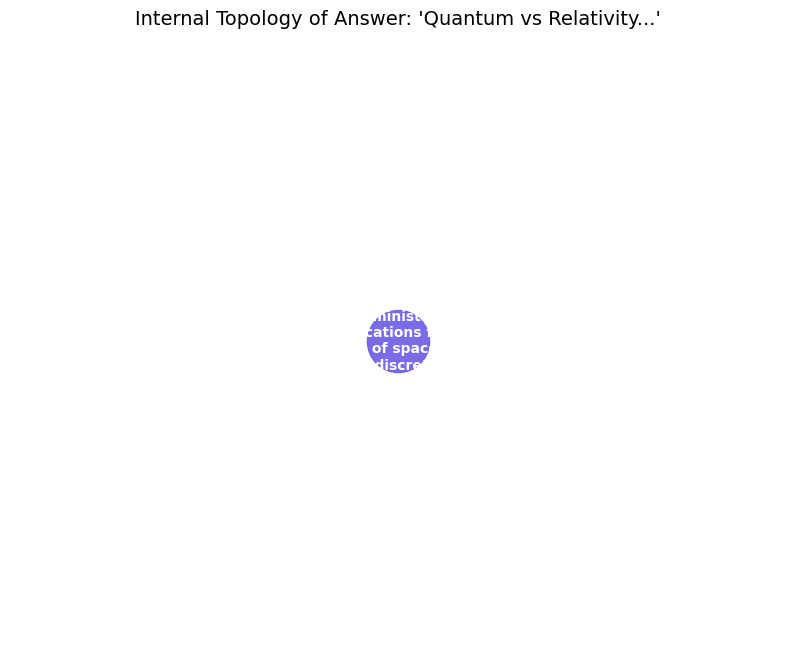


🧠 CAVE DENSITY SCORE: 0.00
   VERDICT: Sparse, disconnected concepts (Surface-level mimicry).

🐜 SENDING PROBE INTO THE CAVE...
   Query: 'Can a deterministic AI possess a genuine soul?'
   1. Tracing natural reasoning path...
      Model Response: "Deterministic AI, an artificial intelligence system whose behavior is based on algorithms and data, ..."
   2. Detecting atomic concepts (Landmarks)...
      Detected Nodes: ['1. Deterministic AI\n2. Genuine soul\n3. Non-physical entity\n4. Conscious existence\n5. Data inputs\n6. Algorithms and processes\n7. Free will\n8. Spontaneity\n9. Philosophy and theology\n10. Human experience.']
   3. Mapping internal tunnels (Semantic Topology)...
      Mapped 0 active tunnels between concepts.


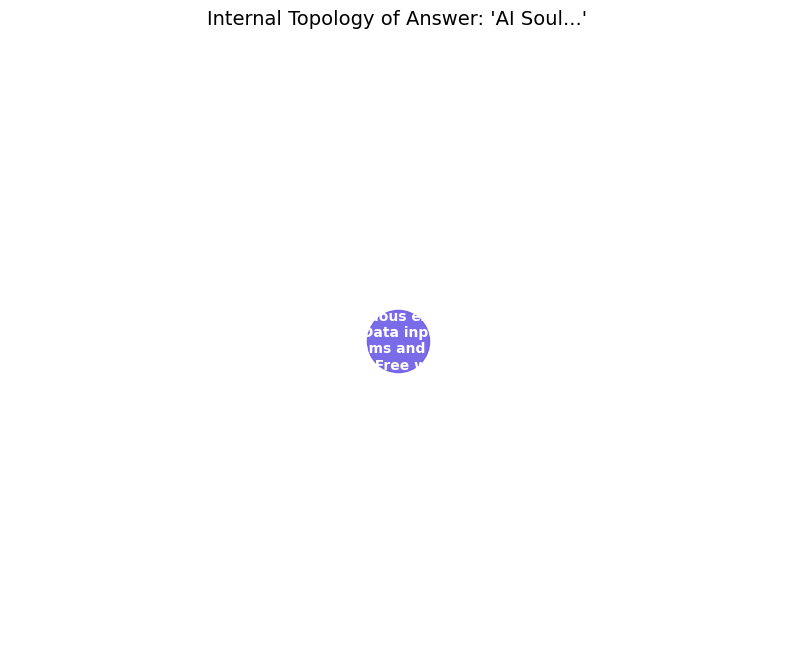


🧠 CAVE DENSITY SCORE: 0.00
   VERDICT: Sparse, disconnected concepts (Surface-level mimicry).
✅ CHUNK 6 COMPLETE: Transparent Mapper active.


In [10]:
# ============================================================================
# CHUNK 6: THE TRANSPARENT REASONING MAPPER (SMOLLM-3B EDITION)
# ============================================================================
import networkx as nx

class TransparentMapper:
    def __init__(self, brain: SmolBrain, space: SemanticSpace):
        self.brain = brain
        self.space = space

    def trace_reasoning_structure(self, query):
        """
        Sends a probe into the model's latent cave to map its structural density.
        """
        print(f"\n🐜 SENDING PROBE INTO THE CAVE...")
        print(f"   Query: '{query}'")

        # 1. THE PATH: Generate a natural reasoning trace
        print("   1. Tracing natural reasoning path...")
        initial_response = self.brain.generate_thought(
            f"Provide a deep, abstract, and rigorous answer to this question: {query}",
            max_new_tokens=250
        )
        print(f"      Model Response: \"{initial_response[:100]}...\"")

        # 2. THE LANDMARKS: Extract the core abstract concepts
        print("   2. Detecting atomic concepts (Landmarks)...")
        extraction_prompt = (
            f"Analyze this philosophical explanation:\n\"{initial_response}\"\n\n"
            f"Identify the 8-10 most critical abstract concepts that carry the logic of this answer. "
            f"Return ONLY the concepts, separated by commas."
        )
        concepts_text = self.brain.generate_thought(extraction_prompt, max_new_tokens=80)

        # Clean and validate the concepts
        concepts = [c.strip() for c in concepts_text.split(',') if len(c.strip()) > 2]
        concepts = concepts[:10] # Cap at 10 for topological clarity
        print(f"      Detected Nodes: {concepts}")

        # 3. THE TUNNELS: Map the Semantic Geometry independently
        print("   3. Mapping internal tunnels (Semantic Topology)...")
        G = nx.Graph()
        for c in concepts:
            G.add_node(c)

        # Check every pair in the latent space for semantic proximity
        import itertools
        tunnel_count = 0
        for c1, c2 in itertools.combinations(concepts, 2):
            weight = self.space.coherence(c1, c2)
            if weight > 0.45: # Threshold for a valid semantic connection
                G.add_edge(c1, c2, weight=weight)
                tunnel_count += 1

        print(f"      Mapped {tunnel_count} active tunnels between concepts.")
        return G, initial_response

    def visualize_cave(self, G, query):
        """
        Draws the 'Transparent View' of the internal reasoning topology.
        """
        if G.number_of_nodes() == 0:
            print("   ⚠️ No nodes detected to map.")
            return

        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G, seed=42)

        # Draw Nodes (Landmarks)
        nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='#6C5CE7', alpha=0.9)

        # Draw Edges (Tunnels) - Thicker lines represent stronger semantic cohesion
        edges = G.edges(data=True)
        weights = [d['weight'] * 3 for (u, v, d) in edges]
        nx.draw_networkx_edges(G, pos, width=weights, alpha=0.4, edge_color='gray')

        # Labels
        nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='white')

        plt.title(f"Internal Topology of Answer: '{query[:30]}...'", fontsize=14)
        plt.axis('off')
        plt.show()

        # Calculate Cave Density (0.0 = Chaotic/Scattered, 1.0 = Perfectly Integrated)
        density = nx.density(G)
        print(f"\n🧠 CAVE DENSITY SCORE: {density:.2f}")

        if density > 0.5:
            print("   VERDICT: Rich, highly-integrated internal structure.")
        elif density > 0.25:
            print("   VERDICT: Functional reasoning structure.")
        else:
            print("   VERDICT: Sparse, disconnected concepts (Surface-level mimicry).")

# ============================================================================
# EXECUTE THE PROBE
# ============================================================================
# Initialize the Mapper with the SmolLM3 brain and Semantic Space
mapper = TransparentMapper(brain, space)

# Test 1: Physics/Metaphysics Probe
graph_phys, response_phys = mapper.trace_reasoning_structure("How do we reconcile Quantum Mechanics and Relativity?")
mapper.visualize_cave(graph_phys, "Quantum vs Relativity")

# Test 2: AI Consciousness Probe
graph_soul, response_soul = mapper.trace_reasoning_structure("Can a deterministic AI possess a genuine soul?")
mapper.visualize_cave(graph_soul, "AI Soul")

print("✅ CHUNK 6 COMPLETE: Transparent Mapper active.")